# 1. EDA

In [1]:
import numpy as np
import pandas as pd

In [2]:
insurance = pd.read_csv("/content/drive/MyDrive/30619 장우준 인공지능/dataset/insurance.csv")
insurance.sample(5)
#charges: 우리가 예측하고자 하는 종속변수 (비용)
# sex: 0-female, 1-male (성별)
# smoker: 0-비흡연, 1-흡연 (흡연 여부)
# children: 자녀수

,age,sex,bmi,children,smoker,charges
32,19,0,28.600,5,0,4687.79700
384,44,1,22.135,2,0,8302.53565
1064,29,0,25.600,4,0,5708.86700
619,55,0,37.100,0,0,10713.64400
620,30,1,31.400,1,0,3659.34600


In [3]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   charges   1338 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 62.8 KB


In [4]:
insurance.describe()

,age,sex,bmi,children,smoker,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010


In [5]:
# 상관관계
corr = insurance.corr()
corr

,age,sex,bmi,children,smoker,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.787251
charges,0.299008,0.057292,0.198341,0.067998,0.787251,1.000000


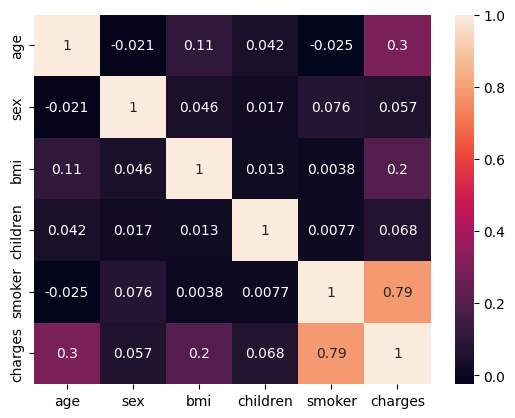

In [6]:
# 히트맵 시각화
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(corr, annot=True)
plt.show()

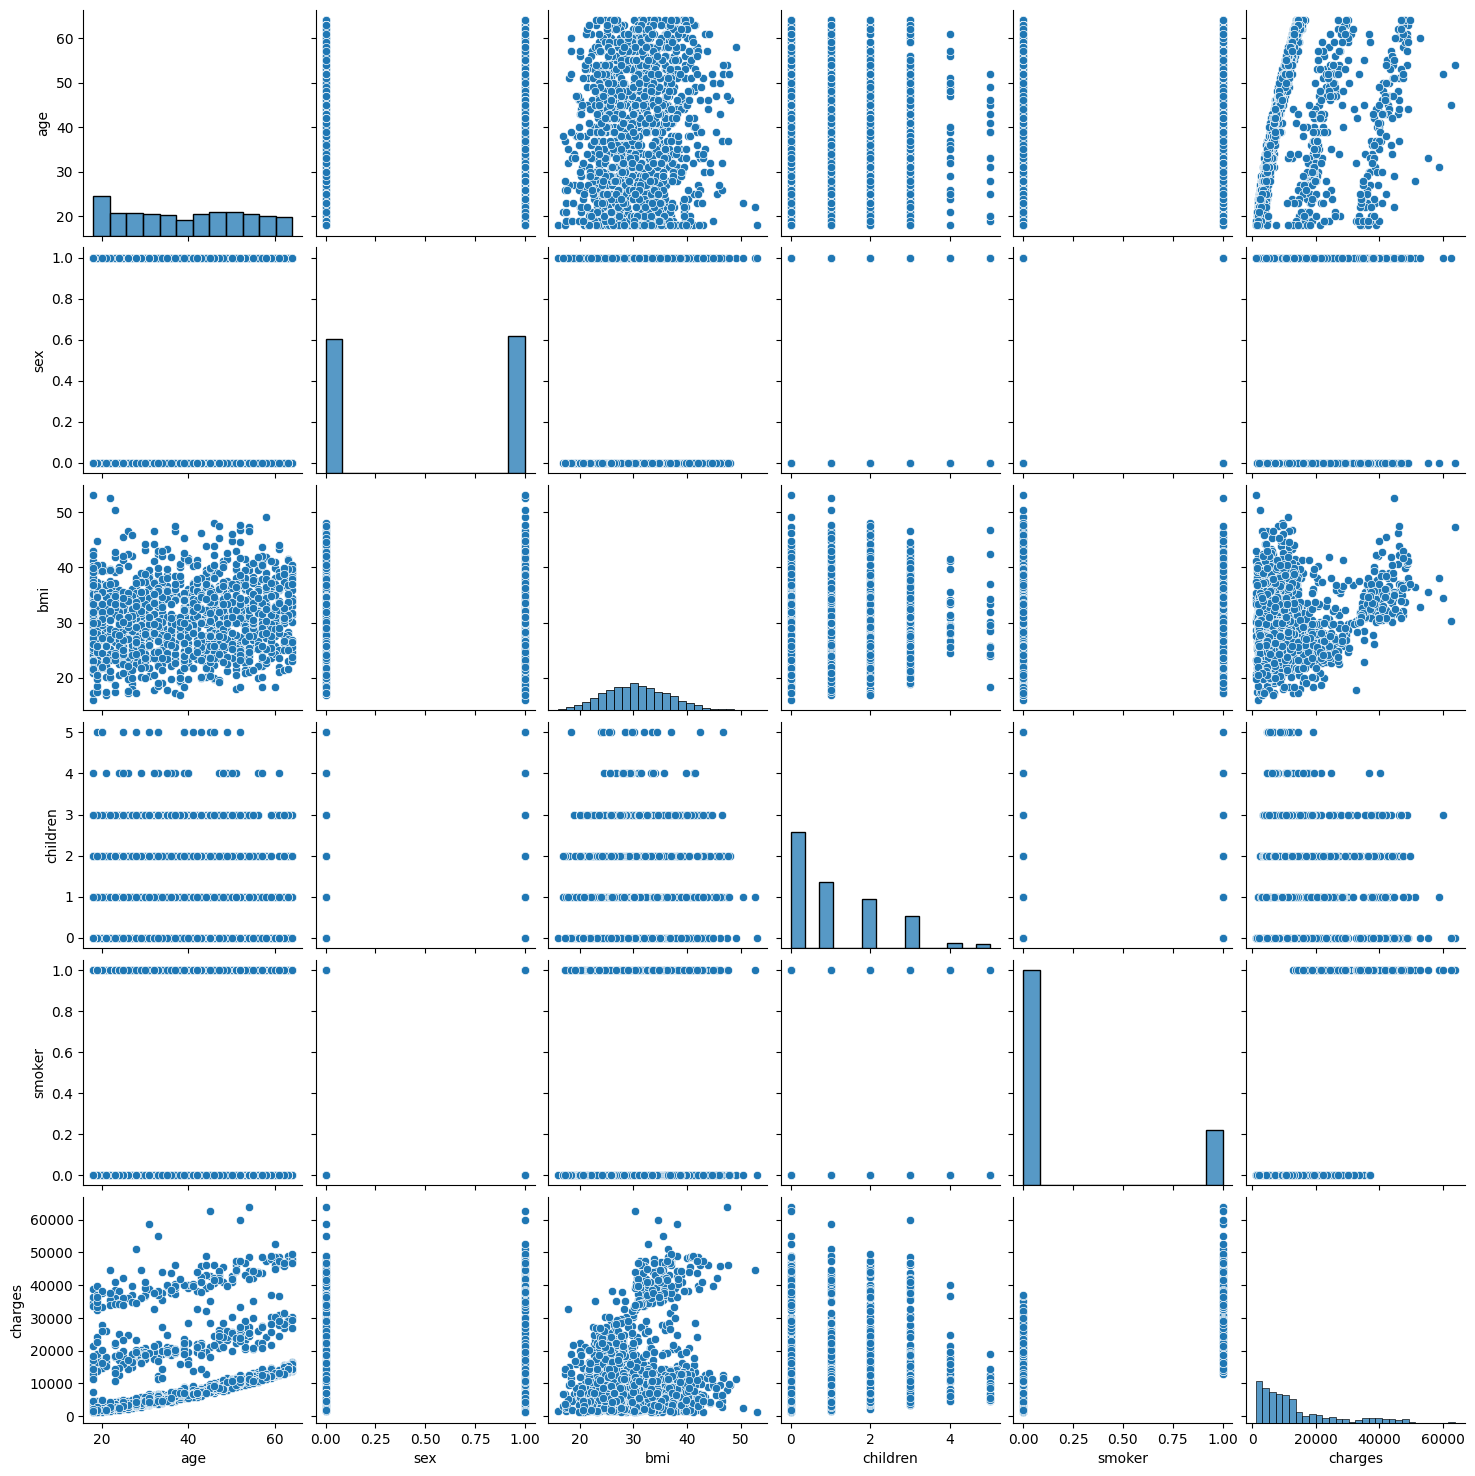

In [7]:
# pairplot

sns.pairplot(insurance)

In [8]:
# 독립변수를 5개로, 종속변수를 1개로 구분: charge 기준으로 해보세요

X = insurance.drop("charges", axis=1)
y = insurance["charges"]

display(X, y)

,age,sex,bmi,children,smoker
0,19,0,27.900,0,1
1,18,1,33.770,1,0
2,28,1,33.000,3,0
3,33,1,22.705,0,0
4,32,1,28.880,0,0
...,...,...,...,...,...
1333,50,1,30.970,3,0
1334,18,0,31.920,0,0
1335,18,0,36.850,0,0
1336,21,0,25.800,0,0


,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


In [9]:
# 훈련/테스트 데이터 분리: 테스트 사이즈는 0.3으로 지정하세요

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(936, 5) (402, 5) (936,) (402,)


# 2. knn

In [10]:
from sklearn.neighbors import KNeighborsRegressor

In [11]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.fit_transform(X_test)
display(X_train_scaled)

array([[-0.56991109,  1.00213904, -0.81786033,  1.63095423,  1.99467376],
       [ 0.49497469,  1.00213904, -1.00007982,  1.63095423, -0.50133512],
       [-1.49281211, -0.99786553,  1.5534666 , -0.91758193, -0.50133512],
       ...,
       [-0.85388064,  1.00213904,  0.29854324, -0.91758193, -0.50133512],
       [-0.78288825, -0.99786553, -2.2376882 , -0.91758193, -0.50133512],
       [ 0.56596707,  1.00213904,  0.86086764, -0.06806988,  1.99467376]])

In [12]:
knr = KNeighborsRegressor()
knr.fit(X_train_scaled, y_train)

print(f"Knr train score = {knr.score(X_train_scaled, y_train)}")
print(f"Knr test score = {knr.score(X_test_scaled, y_test)}")

Knr train score = 0.882637432086137
Knr test score = 0.8016297477885634


In [13]:
knr.n_neighbors = 3

print(f"Knr train score = {knr.score(X_train_scaled, y_train)}")
print(f"Knr test score = {knr.score(X_test_scaled, y_test)}")

Knr train score = 0.9016489048576454
Knr test score = 0.7660265470836849


In [14]:
# 정확도 출력: MAE, MSE, RMSE, MAPE, R2
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

knr_pred = knr.predict(X_test_scaled)

print(f"MAE = {mean_absolute_error(y_test, knr_pred)}")
print(f"MSE = {mean_squared_error(y_test, knr_pred)}")
print(f"RMSE = {np.sqrt(mean_absolute_error(y_test, knr_pred))}")
print(f"MAPE = {mean_squared_error(y_test, knr_pred)}")
print(f"R2 = {r2_score(y_test, knr_pred)}")

MAE = 3307.8288045265335
MSE = 35362920.44790652
RMSE = 57.51372709646397
MAPE = 35362920.44790652
R2 = 0.7660265470836849


# 3. Linear Regression

In [15]:
# 선형 회귀 모델 생성, 학습 + 기울기 절편 출력
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
print(f"lr train score = {lr.score(X_train, y_train)}")
print(f"lr test score = {lr.score(X_test, y_test)}")

lr train score = 0.7572896675330248
lr test score = 0.7318529953727556


In [16]:
# 기울기 = 가중치 = weight 출력
# 편향 = 절편 = bial 출력

print(f"가중치 = {lr.coef_}")
print(f"절편 = {lr.intercept_}")

가중치 = [  261.78568381  -304.89291199   296.11863115   505.70912996
 23939.99347936]
절편 = -11397.054877398688


In [17]:
# 나이, 성별, BMI, 자녀수, 흡연여부
me = [[19, 1, 29.5, 0, 1]]
print(lr.predict(me))

[25947.47330115]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [26]:
# 정확도 5개 비교하기: MAE, MSE, MAPE, RMSE, R2 Score
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
lr_pred = lr.predict(X_test)

print(f"MAE = {mean_absolute_error(y_test, lr_pred)}")
print(f"MSE = {mean_squared_error(y_test, lr_pred)}")
print(f"MAPE = {mean_absolute_percentage_error(y_test, lr_pred)}")
print(f"RMSE = {np.sqrt(mean_squared_error(y_test, lr_pred))}")
print(f"r2_score = {r2_score(y_test, lr_pred)}")

MAE = 4160.662527996981
MSE = 40527936.28843543
MAPE = 0.3770096543379162
RMSE = 6366.155534420709
r2_score = 0.7318529953727556


In [27]:
# 실제 값과 예측 값 비교 시각화
comparison = pd.DataFrame({"actual": y_test, "pred": lr_pred})
comparison

,actual,pred
824,12523.60480,11206.798348
58,23244.79020,33698.483254
168,2719.27975,3506.557681
1336,2007.94500,1740.305166
203,37133.89820,30295.112277
...,...,...
501,6837.36870,7262.804583
285,7742.10980,8728.580757
434,4243.59005,5386.629796
669,6500.23590,8407.377999


<Axes: xlabel='actual', ylabel='pred'>

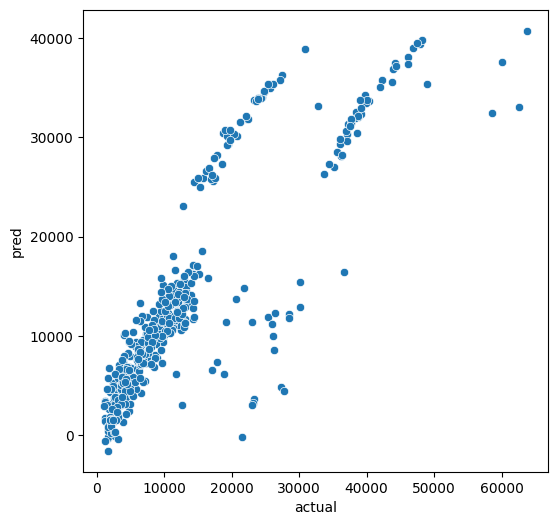

In [29]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x="actual", y="pred", data=comparison)

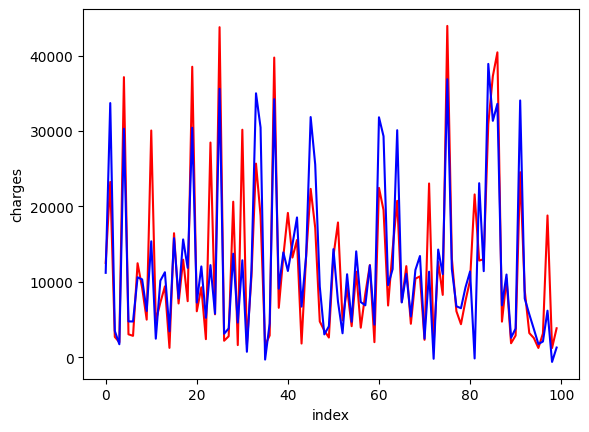

In [30]:
# 실제 값과 예측 값 시각화: 몇 개만 확인하자
num = 100
plt.plot(range(num), y_test[:num], c="r") # 실제 값
plt.plot(range(num), lr_pred[:num], c="b") # 예측 값
plt.xlabel("index")
plt.ylabel("charges")
plt.show()

# 4. Decision Tree

In [35]:
# DTR을 사용해서 학습, score 출력, depth도 출력
from sklearn.tree import DecisionTreeRegressor, plot_tree

dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
print(f"DTR train score = {dtr.score(X_train, y_train)}")
print(f"DTR test score = {dtr.score(X_test, y_test)}")
print(f"DTR depth = {dtr.get_depth()}")

DTR train score = 0.9986457806624317
DTR test score = 0.6917109426596006
DTR depth = 17


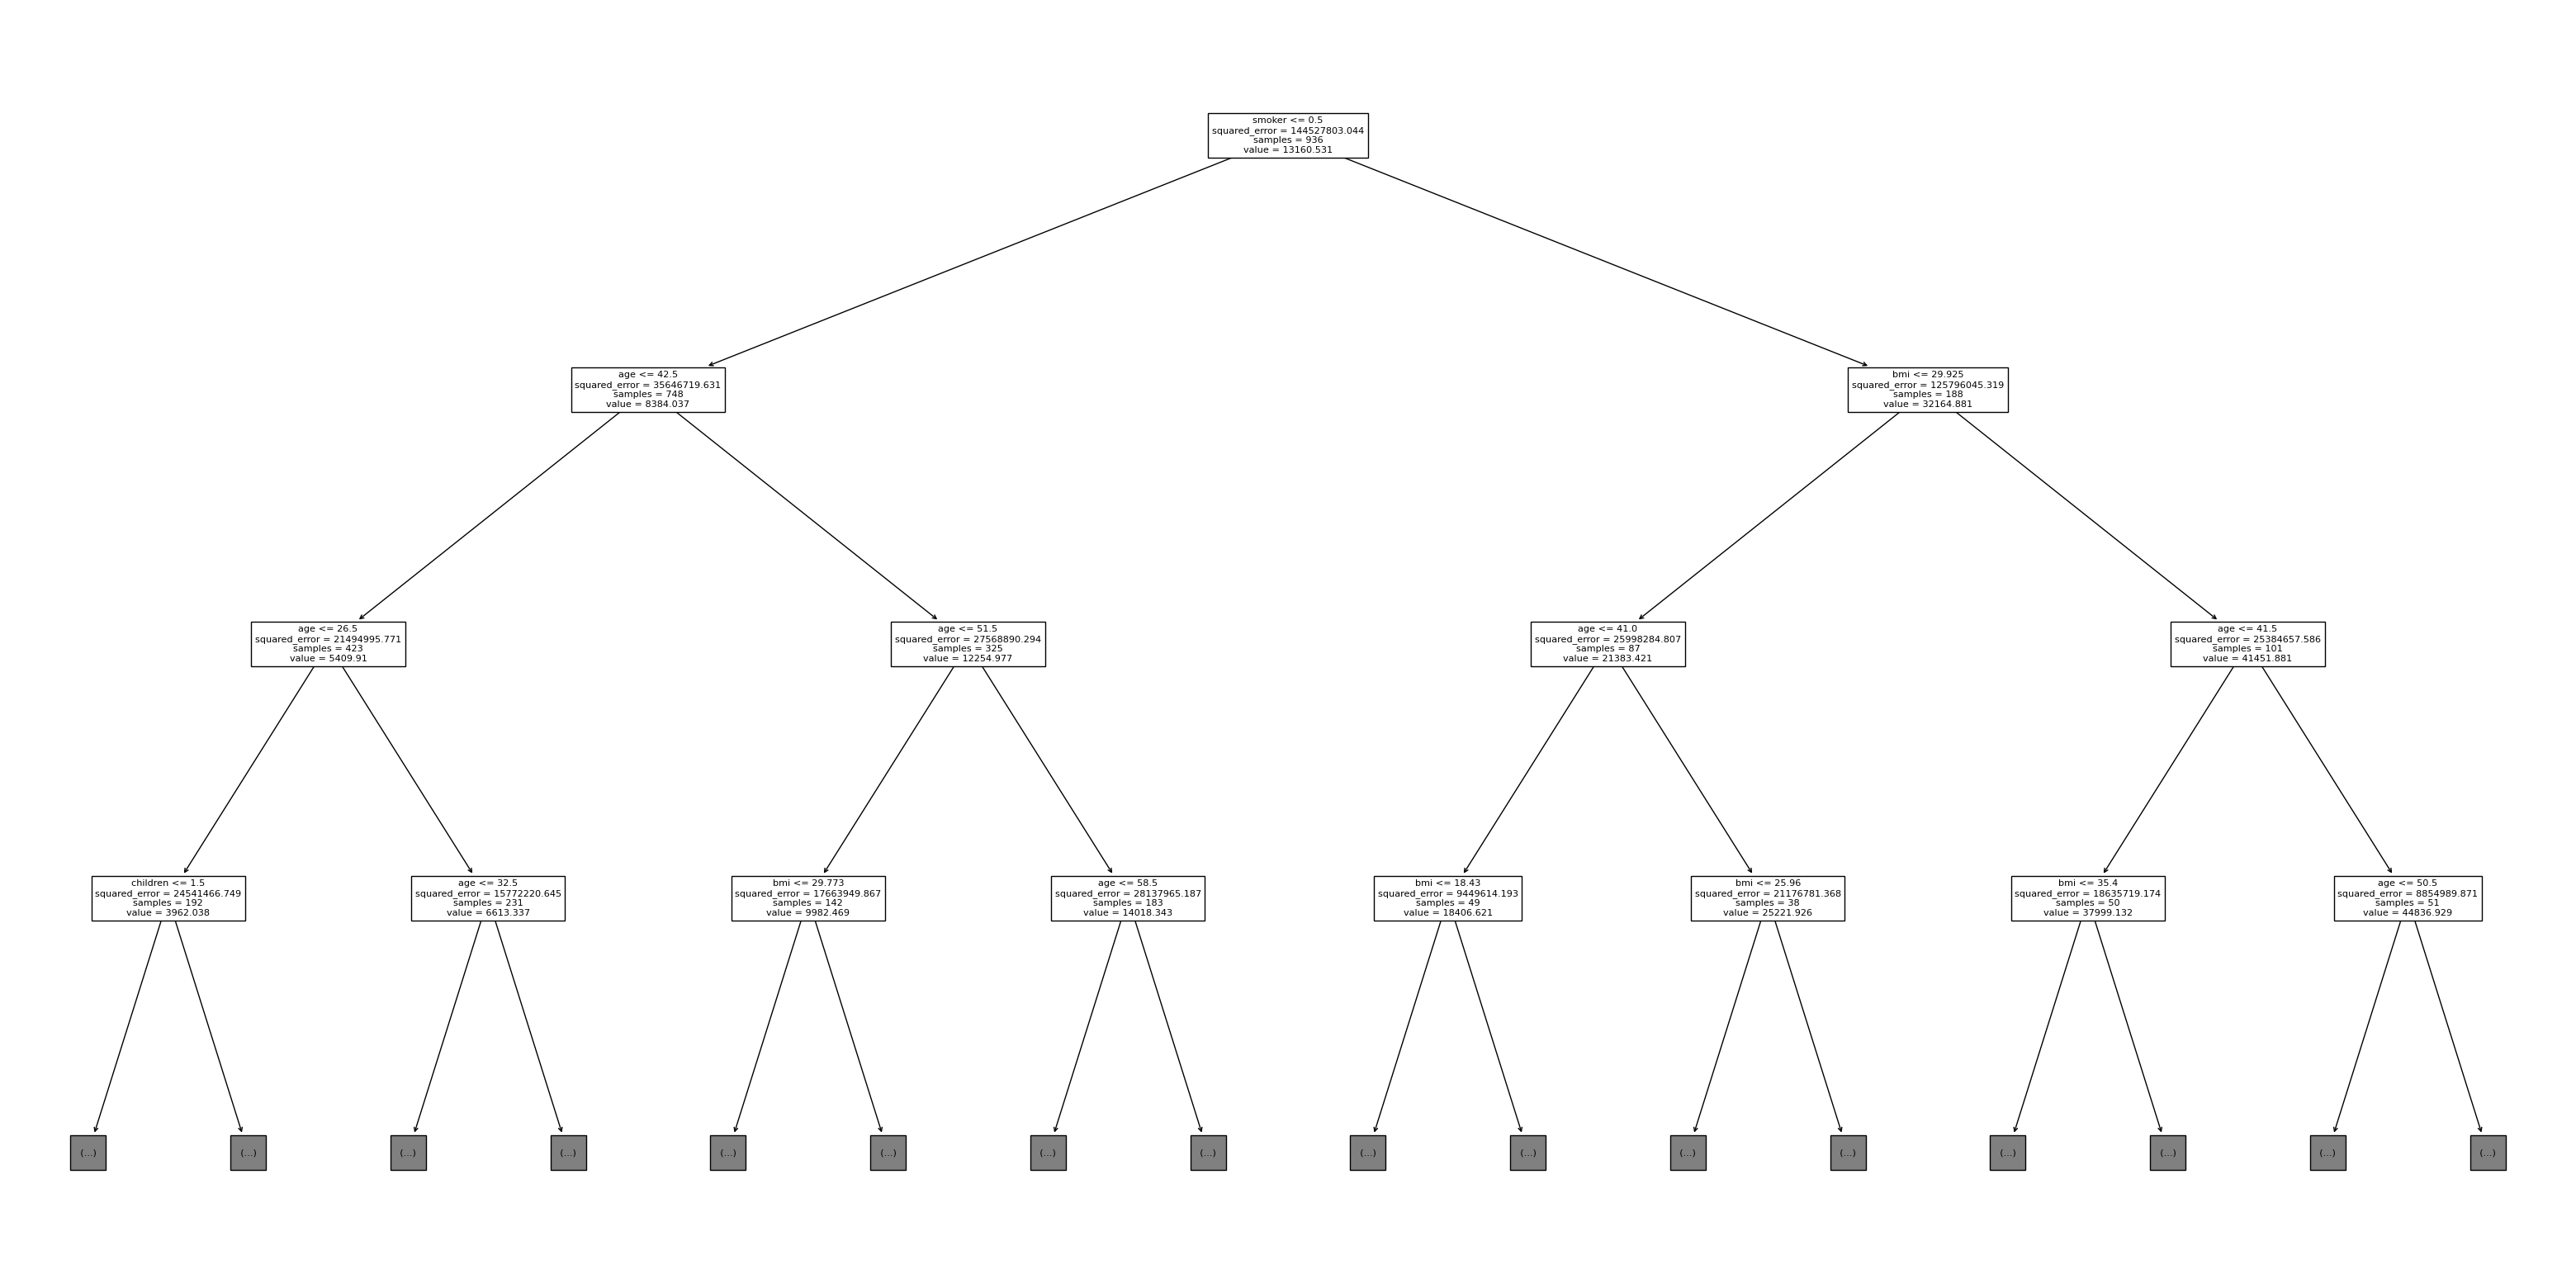

In [39]:
# DTR 트리 시각화
plt.figure(figsize=(40, 20))
plot_tree(dtr, feature_names=X.columns, max_depth=3)
plt.show()

특성 중요도 = [0.12734693 0.00706737 0.21795831 0.0187016  0.62892579]
특성 목록 = Index(['age', 'sex', 'bmi', 'children', 'smoker'], dtype='object')


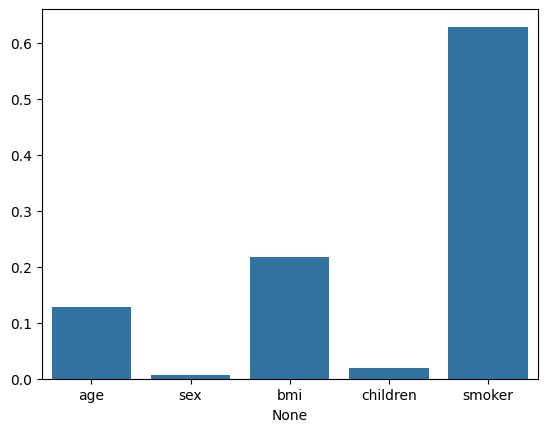

In [46]:
# 특성 중요도 출력 및 시각화
print(f"특성 중요도 = {dtr.feature_importances_}")
print(f"특성 목록 = {X.columns}")

sns.barplot(x=X.columns, y=dtr.feature_importances_)
plt.show()

In [52]:
# 그리드 서치
# 최적의 하이퍼 파라미터, 최고 예측 정확도 출력
from sklearn.model_selection import GridSearchCV
params = {
    "max_depth": [3, 4, 5, 6],
    "min_samples_split": [5, 6, 7, 8],
    "min_samples_leaf": [5, 6, 7, 8],
}
gs = GridSearchCV(DecisionTreeRegressor(), params)
gs.fit(X_train, y_train)

print(f"최고의 하이퍼 파라미터 = {gs.best_params_}")
print(f"최고의 예측 정확도 = {gs.best_score_}")

최고의 하이퍼 파라미터 = {'max_depth': 4, 'min_samples_leaf': 8, 'min_samples_split': 5}
최고의 예측 정확도 = 0.8525017543032158


In [51]:
# 최적의 모델로 저장 후 스코어 출력
dtr_final = gs.best_estimator_

print(f"DTR final train score = {dtr_final.score(X_train, y_train)}")
print(f"DTR final test score = {dtr_final.score(X_test, y_test)}")

DTR final train score = 0.8756045814415347
DTR final test score = 0.8414780061983448


In [53]:
# 나이, 성별, BMI, 자녀수, 흡연여부
me = [[19, 1, 29.5, 0, 1]]
print(dtr_final.predict(me))

[17358.20764]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


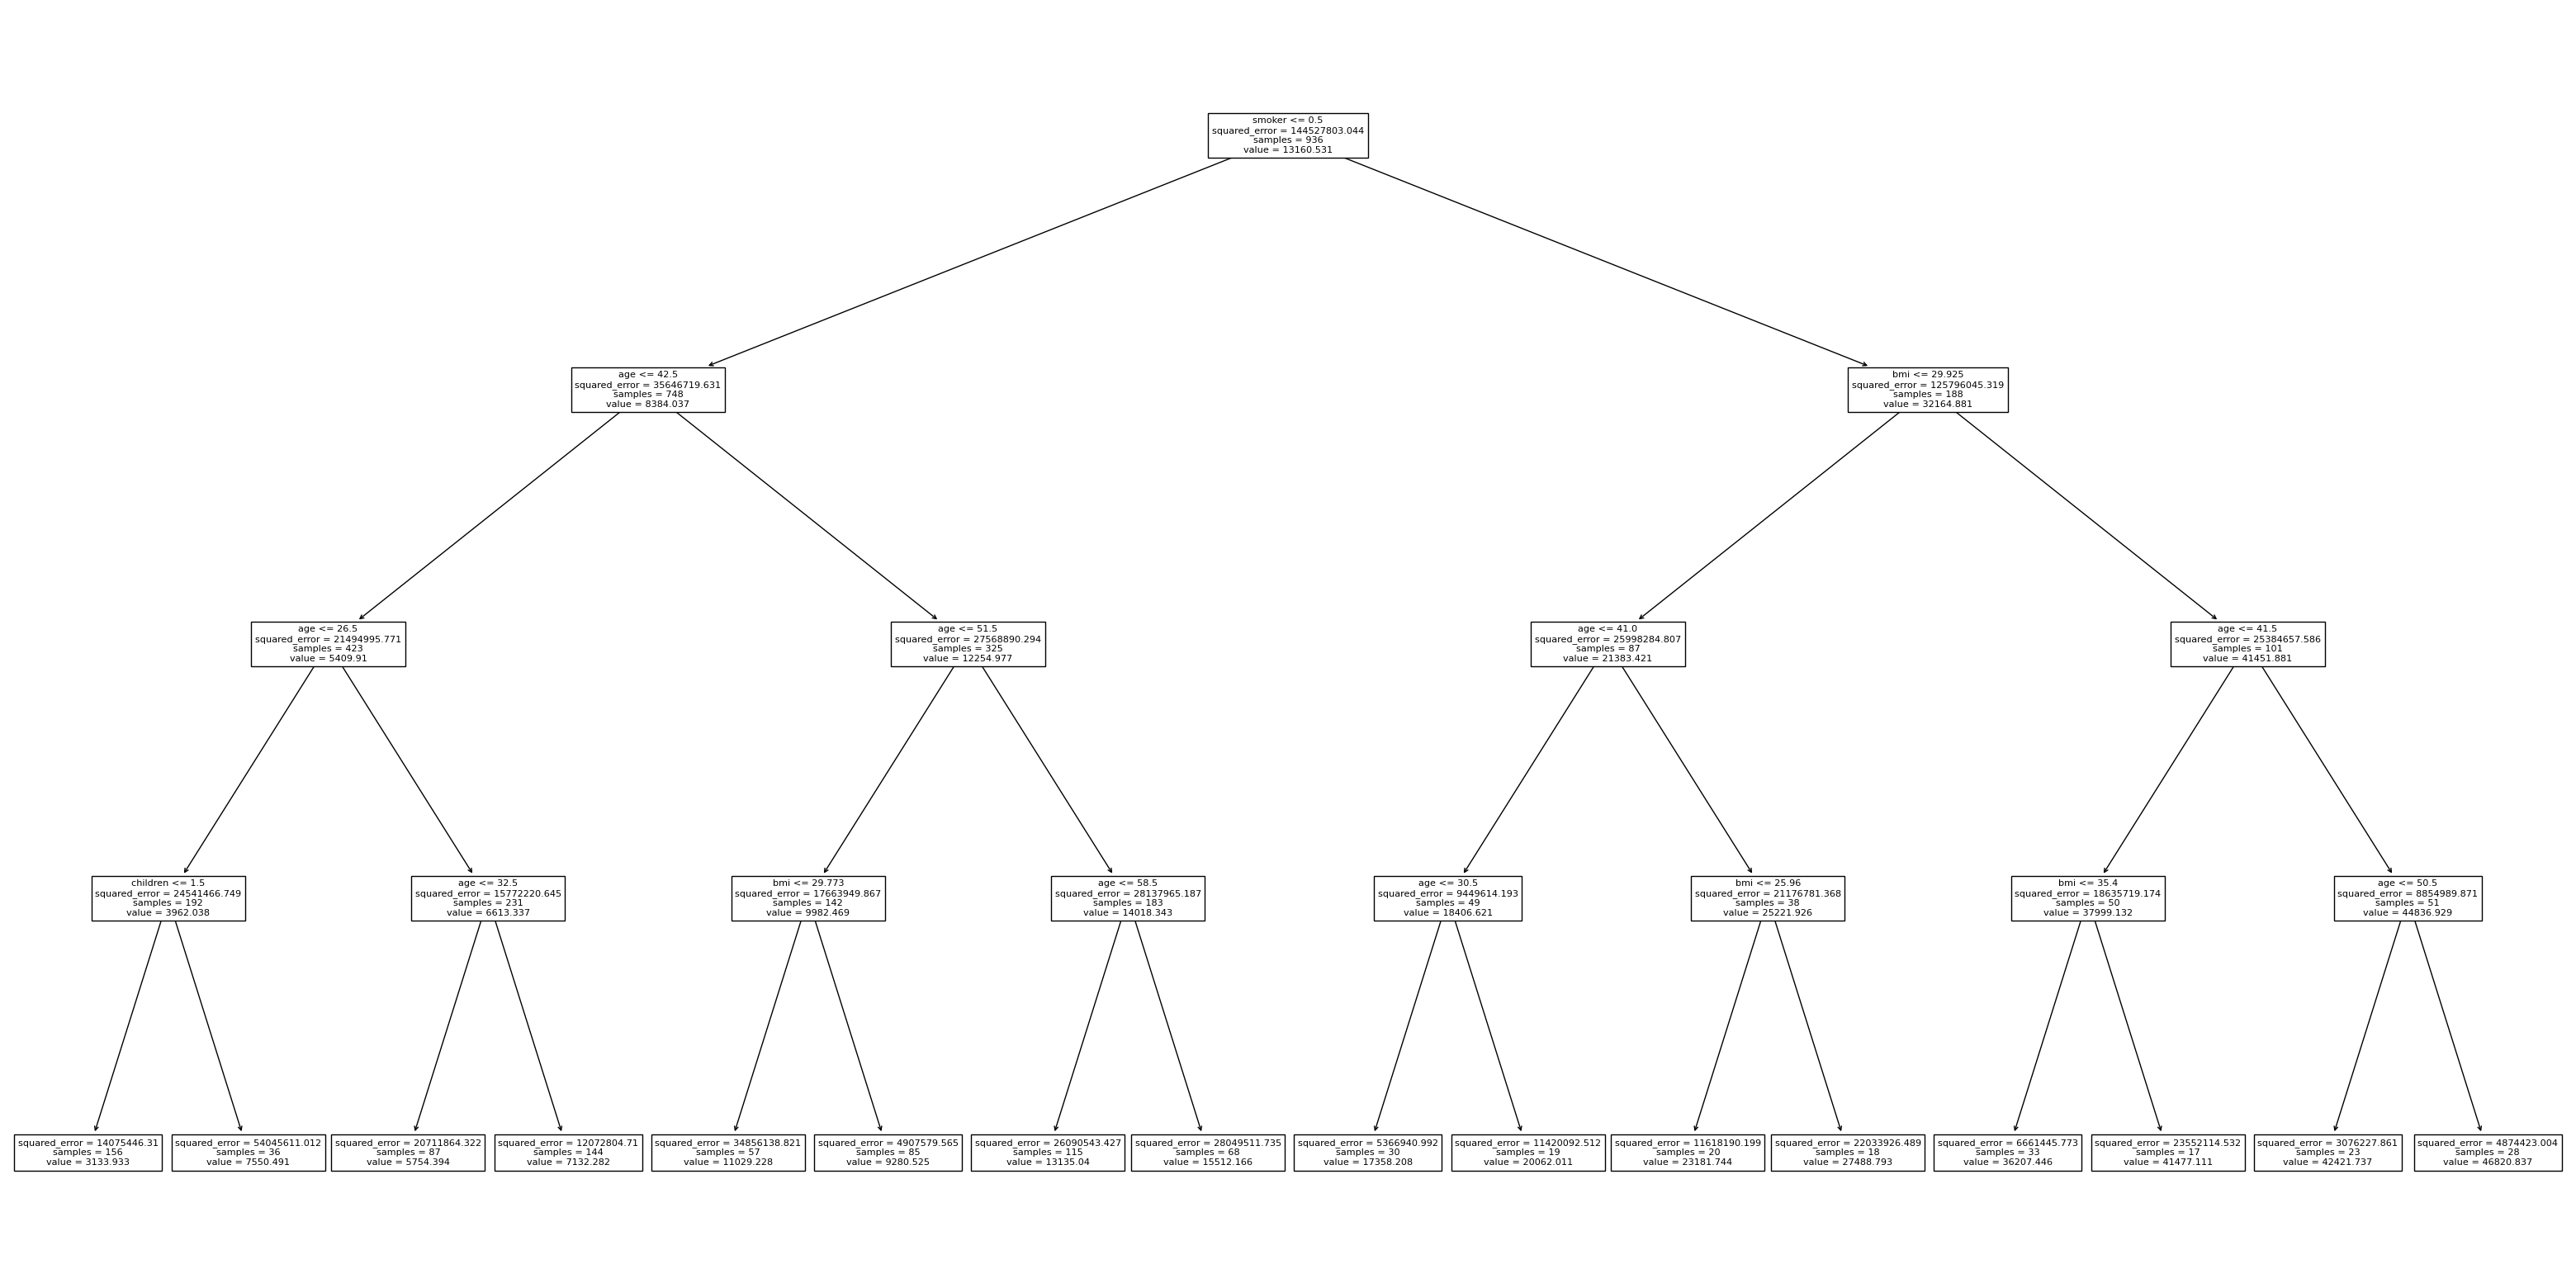

In [57]:
plt.figure(figsize=(40, 20))
plot_tree(dtr_final, feature_names=X.columns)
plt.show()

<Axes: xlabel='None'>

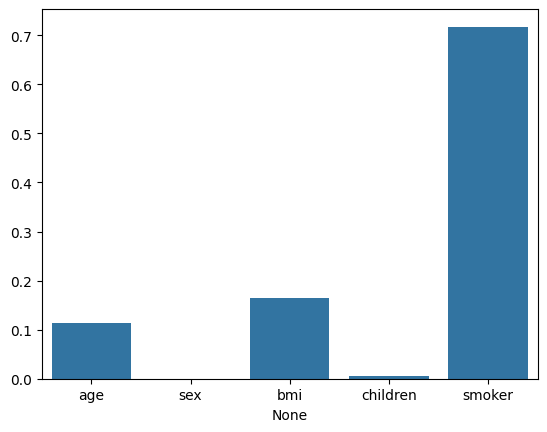

In [58]:
# 특성 중요도 시각화
sns.barplot(x=X.columns, y=dtr_final.feature_importances_)

# 5. Random Forest

In [60]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

print(f"rfr train score = {rfr.score(X_train, y_train)}")
print(f"rfr test score = {rfr.score(X_test, y_test)}")

rfr train score = 0.9762061936313939
rfr test score = 0.8133108878720448


In [62]:
# 그리드 서치
# 최적의 하이퍼 파라미터, 최고 예측 정확도 출력
from sklearn.model_selection import GridSearchCV
params = {
    "n_estimators": [100, 150, 200],
    "max_depth": [3, 4, 5],
    "min_samples_split": [6, 7, 8],
    "min_samples_leaf": [5, 6, 7],
}
gs = GridSearchCV(RandomForestRegressor(), params)
gs.fit(X_train, y_train)

print(f"최고의 하이퍼 파라미터 = {gs.best_params_}")
print(f"최고의 예측 정확도 = {gs.best_score_}")

최고의 하이퍼 파라미터 = {'max_depth': 5, 'min_samples_leaf': 7, 'min_samples_split': 7, 'n_estimators': 150}
최고의 예측 정확도 = 0.858537474475104


In [64]:
# 최적의 모델로 저장 후 스코어 출력
rfr_final = gs.best_estimator_

print(f"rfr final train score = {rfr_final.score(X_train, y_train)}")
print(f"rfr final test score = {rfr_final.score(X_test, y_test)}")

rfr final train score = 0.8898664639079771
rfr final test score = 0.8503079280054074


In [69]:
# 나이, 성별, BMI, 자녀수, 흡연여부
me = [[19, 1, 29.5, 0, 1]]
print(rfr_final.predict(me))

[17473.78067036]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


[0.1207089  0.00187587 0.1659339  0.00934818 0.70213314]
Index(['age', 'sex', 'bmi', 'children', 'smoker'], dtype='object')


<Axes: xlabel='None'>

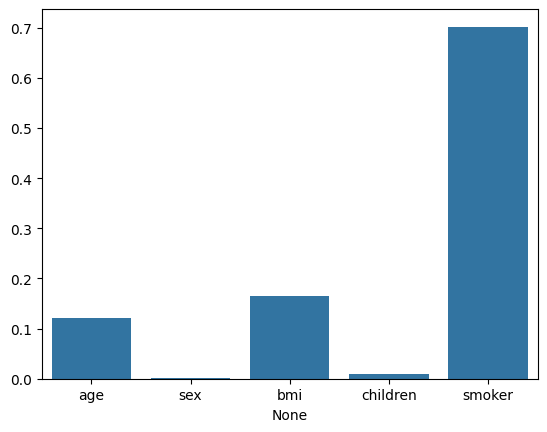

In [68]:
print(rfr_final.feature_importances_)
print(X.columns)
sns.barplot(x=X.columns, y=rfr_final.feature_importances_)

# 6. Gradient Boosting

In [70]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

print(f"gbr train score = {gbr.score(X_train, y_train)}")
print(f"gbr test score = {gbr.score(X_test, y_test)}")

gbr train score = 0.9109376975631029
gbr test score = 0.8283510919030906


In [76]:
# 그리드 서치
# 최적의 하이퍼 파라미터, 최고 예측 정확도 출력
params = {
    "n_estimators": [100, 150, 200],
    "max_depth": [3, 4, 5],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
}
gs = GridSearchCV(GradientBoostingRegressor(), params)
gs.fit(X_train, y_train)

print(f"최고의 하이퍼 파라미터 = {gs.best_params_}")
print(f"최고의 예측 정확도 = {gs.best_score_}")

최고의 하이퍼 파라미터 = {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
최고의 예측 정확도 = 0.8601059665361301


In [77]:
# 최적의 모델로 저장 후 스코어 출력
gbr_final = gs.best_estimator_

print(f"gbr final train score = {gbr_final.score(X_train, y_train)}")
print(f"gbr final test score = {gbr_final.score(X_test, y_test)}")

gbr final train score = 0.8901778170453603
gbr final test score = 0.8422371687362346


In [80]:
gbr_pred = gbr_final.predict(X_test)

print(f"MAE = {mean_absolute_error(y_test, gbr_pred)}")
print(f"MSE = {mean_squared_error(y_test, gbr_pred)}")
print(f"MAPE = {mean_absolute_percentage_error(y_test, gbr_pred)}")
print(f"RMSE = {np.sqrt(mean_squared_error(y_test, gbr_pred))}")
print(f"r2_score = {r2_score(y_test, gbr_pred)}")

MAE = 2627.212233359001
MSE = 23844390.814766716
MAPE = 0.29065985140106143
RMSE = 4883.071862543773
r2_score = 0.8422371687362346


In [78]:
# 나이, 성별, BMI, 자녀수, 흡연여부
me = [[19, 1, 29.5, 0, 1]]
print(gbr_final.predict(me))

[18387.07202135]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


[0.11714864 0.00092373 0.16856862 0.00771714 0.70564187]
Index(['age', 'sex', 'bmi', 'children', 'smoker'], dtype='object')


<Axes: xlabel='None'>

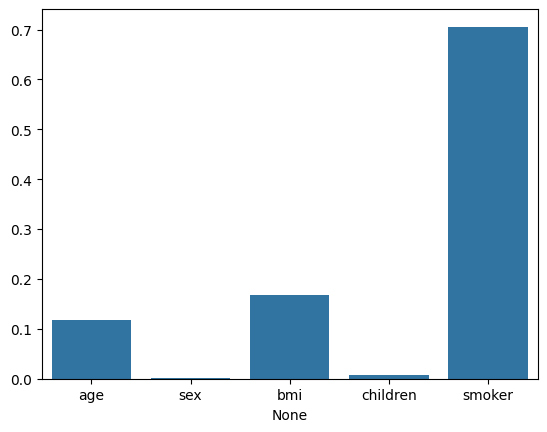

In [79]:
print(gbr_final.feature_importances_)
print(X.columns)
sns.barplot(x=X.columns, y=gbr_final.feature_importances_)

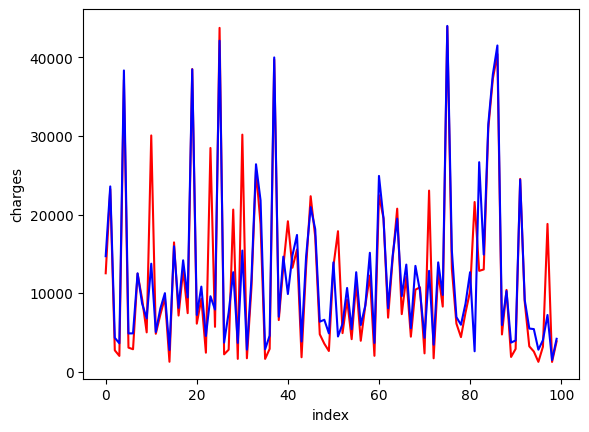

In [81]:
n_samples = 100
plt.plot(range(n_samples), y_test[:n_samples], c="r") # 실제 값
plt.plot(range(n_samples), gbr_pred[:n_samples], c="b") # 예측 값
plt.xlabel("index")
plt.ylabel("charges")
plt.show()

Text(0, 0.5, 'residual')

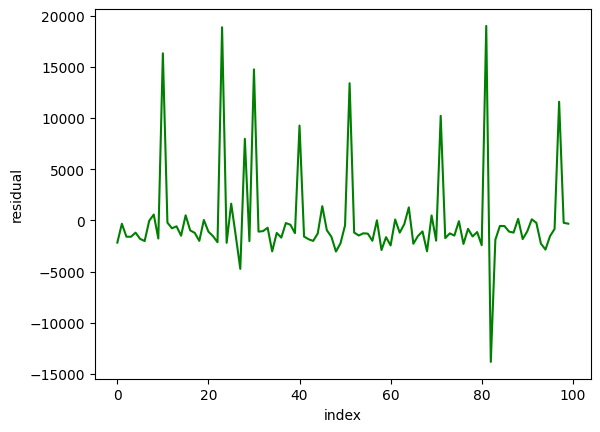

In [83]:
# 오차 시각화
error = y_test - gbr_pred
plt.plot(range(n_samples), error[:n_samples], c="g")
plt.xlabel("index")
plt.ylabel("residual")